In [2]:
import sys
import mglearn as mglearn
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

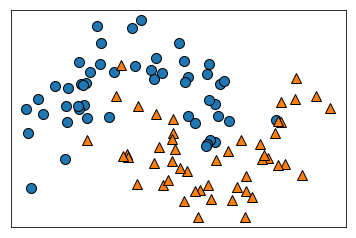

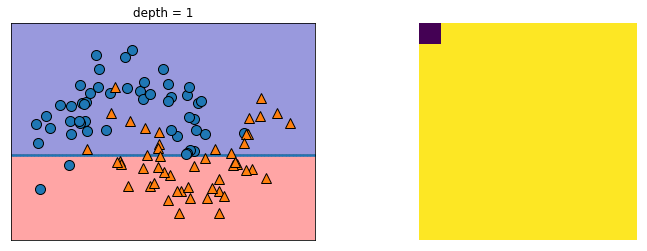

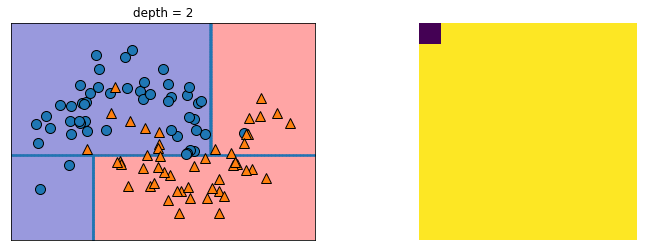

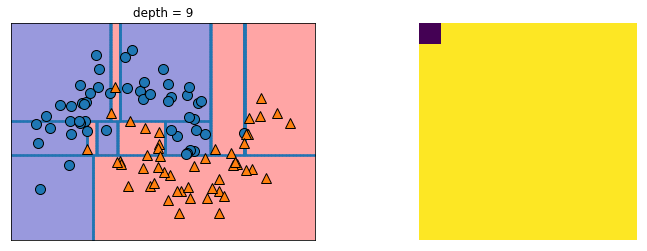

In [5]:
mglearn.plots.plot_tree_progressive()


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))


Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.937


In [10]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.951


In [25]:
from sklearn.tree import export_graphviz
graph_name = "tree.dot"
export_graphviz(tree, out_file=graph_name, class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=False)

In [27]:
import graphviz

with open(graph_name) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)



ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [28]:
import pydotplus
dot_data = export_graphviz(tree, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("cancer.pdf")

InvocationException: GraphViz's executables not found

In [23]:
from IPython.display import Image
dot_data = export_graphviz(tree, out_file=None,
 feature_names=cancer.feature_names,
 class_names=cancer.target_names,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [29]:
for name, score in zip(cancer["feature_names"], tree.feature_importances_):
 print(name, score)


mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.0101973682021
texture error 0.0483982536186
perimeter error 0.0
area error 0.0
smoothness error 0.00241559508532
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.72682850946
worst texture 0.0458158970889
worst perimeter 0.0
worst area 0.0
worst smoothness 0.0141577021047
worst compactness 0.0
worst concavity 0.0181879968645
worst concave points 0.122113199265
worst symmetry 0.0118854783101
worst fractal dimension 0.0


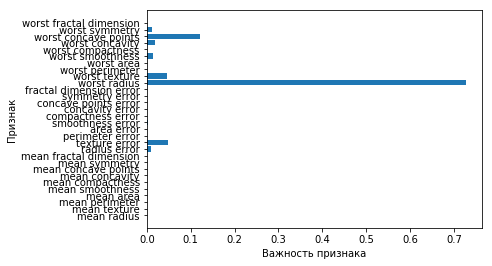

In [30]:
def plot_feature_importances_cancer(model):
 n_features = cancer.data.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), cancer.feature_names)
 plt.xlabel("Важность признака")
 plt.ylabel("Признак")
plot_feature_importances_cancer(tree)

Text(0,0.5,'Цена $/Мбайт')

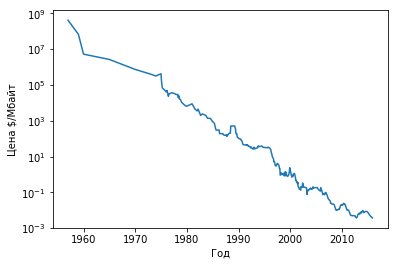

In [32]:
ram_prices = pd.read_csv("C:/Data/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Год")
plt.ylabel("Цена $/Мбайт")

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

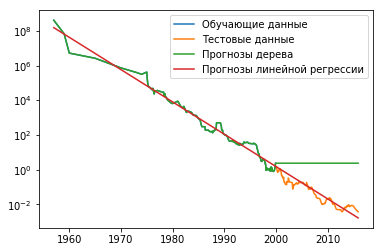

In [35]:
plt.semilogy(data_train.date, data_train.price, label="Обучающие данные")
plt.semilogy(data_test.date, data_test.price, label="Тестовые данные")
plt.semilogy(ram_prices.date, price_tree, label="Прогнозы дерева")
plt.semilogy(ram_prices.date, price_lr, label="Прогнозы линейной регрессии")
plt.legend()